<a href="https://colab.research.google.com/github/darshan-k3/Low-Complexity-Deepfake-Detection-Model/blob/main/Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

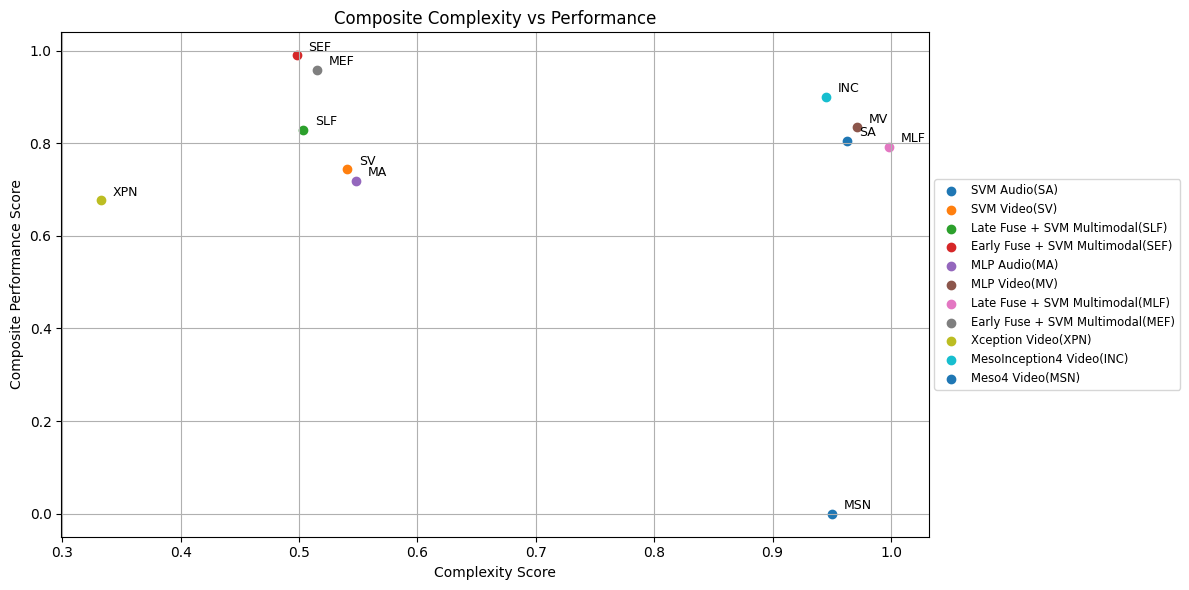

(None,
    Model  Complexity Score  Performance Score
 0     SA          0.963144           0.805593
 1     SV          0.540526           0.743463
 2    SLF          0.503255           0.828646
 3    SEF          0.497891           0.989786
 4     MA          0.547786           0.718859
 5     MV          0.971656           0.834640
 6    MLF          0.998472           0.792477
 7    MEF          0.515361           0.958840
 8    XPN          0.332454           0.676443
 9    INC          0.945172           0.900051
 10   MSN          0.950223           0.000000)

In [ ]:
# Author: 21004275
# This script processes a dataset of machine learning model performances and visualizes their complexity vs. performance.

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Initialise dataset with model performance metrics.
data = {
    "Model": ["SA", "SV", "SLF", "SEF", "MA", "MV", "MLF", "MEF", "XPN", "INC", "MSN"],
    "Memory Usage (kB)": [78.81, 700.64, 789.21, 419.40, 243.21, 75.48, 324.54, 272.09, 81597.92, 108.35, 100.14],
    "Time Spent (s)": [14.52, 175.30, 189.40, 192.33, 173.59, 11.26, 0.3787, 185.97, 64.70, 21.35, 19.43],
    "Accuracy (%)": [79.37, 76.88, 78.12, 88.75, 76.88, 77.50, 71.88, 85.00, 74.51, 87.32, 50.32],
    "AUC-ROC": [79.89, 74.45, 82.84, 91.13, 70.18, 85.96, 86.11, 92.42, 83.31, 87.32, 50.32],
    "F2 Score": [92.48, 92.88, 94.14, 94.66, 94.33, 92.04, 92.89, 93.30, 74.51, 87.23, 42.15]
}

# Extended model names for labeling.
model_labels = [
    "SVM Audio", "SVM Video", "Late Fuse + SVM Multimodal", "Early Fuse + SVM Multimodal",
    "MLP Audio", "MLP Video", "Late Fuse + SVM Multimodal", "Early Fuse + SVM Multimodal", "Xception Video",
    "MesoInception4 Video", "Meso4 Video"
]

df = pd.DataFrame(data)

# Preparing data for visualisation: normalisation and computation of performance and complexity scores.
df_transformed = df[['Memory Usage (kB)', 'Time Spent (s)', 'Accuracy (%)', 'AUC-ROC', 'F2 Score']]
scaler = MinMaxScaler()
df_normalised = pd.DataFrame(scaler.fit_transform(df_transformed), columns=df_transformed.columns)
df_normalised['Performance Score'] = df_normalised[['Accuracy (%)', 'AUC-ROC', 'F2 Score']].mean(axis=1)
df_normalised['Complexity Score'] = 1 - df_normalised[['Memory Usage (kB)', 'Time Spent (s)']].mean(axis=1)
df_normalised['Model'] = df['Model']

# Visualising the relationship between model complexity and performance.
plt.figure(figsize=(12, 6))
x_offset, y_offset = 0.01, 0.01  # For text annotation positioning.

for index, row in df_normalised.iterrows():
    plt.scatter(row['Complexity Score'], row['Performance Score'], label=model_labels[index] + "(" + row['Model'] + ")")
    plt.text(row['Complexity Score'] + x_offset, row['Performance Score'] + y_offset, row['Model'], fontsize=9)

plt.xlabel('Complexity Score')
plt.ylabel('Composite Performance Score')
plt.title('Composite Complexity vs Performance')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show(), df_normalised[['Model', 'Complexity Score', 'Performance Score']]


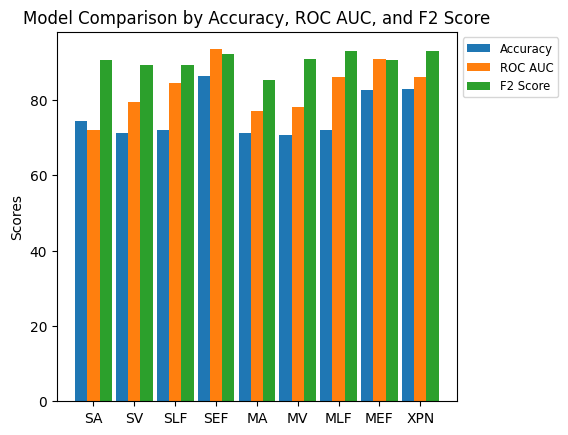

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# models = ['Model 1', 'Model 2', 'Model 3']
models = df['Model']
accuracy = df['Accuracy (%)']
roc_auc = df['AUC-ROC']
f2_score = df['F2 Score']

x = np.arange(len(models))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x, roc_auc, width, label='ROC AUC')
rects3 = ax.bar(x + width , f2_score, width, label='F2 Score')

ax.set_ylabel('Scores')
ax.set_title('Model Comparison by Accuracy, ROC AUC, and F2 Score')
ax.set_xticks(x)
ax.set_xticklabels(models)

# Move legend outside
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')

plt.subplots_adjust(right=0.75)  # Adjust subplot to make room for the legend

plt.show()
